In [ ]:
import pandas as pd
# Load dataset
data_path = '../data/OnlineRetail.csv'  # Adjust path if needed
df = pd.read_csv(data_path, encoding='latin1')  # Encoding needed for special characters
# Preview data
df.head()

In [ ]:
print(f"Dataset shape: {df.shape}")
print(df.info())

In [ ]:
df.isnull().sum()

In [ ]:
df_clean = df.dropna(subset=['CustomerID']).copy()

Many records with **missing Customer ID**, which makes it inefficient for analysis purposes based on the customer. We remove NaN rows of CustomerID column.

In [ ]:
df_clean['InvoiceDate'] = pd.to_datetime(df_clean['InvoiceDate'])

Currently, InvoiceDate is an object/string datatype which makes it difficult to extract individual date and time elements. Therefore, we **convert it's datatype to datetime** using pd.to_datetime function.

In [ ]:
df_clean.info()

Cleaned data is much more easier for analysis purpose and removing NaN CustomerID rows autometically removed NaN Description rows too.

In [ ]:
df_clean.duplicated().sum()

In [ ]:
df_clean = df_clean.drop_duplicates()

Find and remove duplicate rows in dataset to avoid wrong analysis.

In [ ]:
df_clean['Country'].unique()

Examining unique countries in the dataframe.

In [ ]:
df_clean['TotalPrice'] = df_clean['Quantity']*df_clean['UnitPrice']

Make **new column TotalPrice** for analysis.

In [ ]:
df_clean.head()

In [ ]:
df_clean = df_clean[df_clean['Quantity']>0]

Remove all columns with negative quantities which means returns.

In [ ]:
df_clean.info()

In [ ]:
df_clean.describe()

#### Anomalies analysis findings based cleaning

In [ ]:
junkcodes = ['POST', 'M', 'DOT']
df_clean = df_clean[~df_clean['StockCode'].isin(junkcodes)]

Remove **non product entries** from anomalies analysis result.

In [ ]:
unspec_count = df_clean[df_clean['Country']=='Unspecified'].shape[0]
print(f"Removing {unspec_count} rows with country 'Unspecified'")
df_clean = df_clean[df_clean['Country']!='Unspecified']

Remove 241 **unspecified countries** entries from anomalies analysis result.

In [ ]:
zero_count = df_clean[df_clean['UnitPrice']<0.5].shape[0]
print(f"Removing {zero_count} rows with 0 to 0.5 UnitPrice")
df_clean = df_clean[df_clean['UnitPrice']>=0.5]

Removed 38923 rows with **0 to 0.5 UnitPrice**

In [ ]:
df_clean.to_csv('cleaned_online_retail.csv',index=False)

Move cleaned dataframe to a new csv file.

## Exploratory Data Analysis

In [ ]:
import matplotlib.pyplot as plt

### Top Selling Products

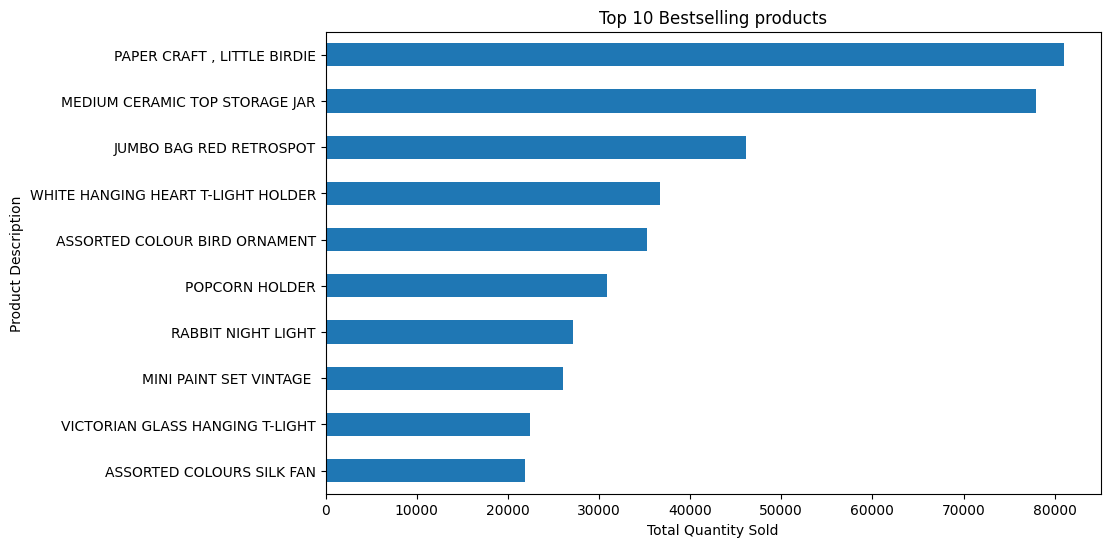

In [37]:
top_products = (
    df_clean.groupby('Description')['Quantity']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)
plt.figure(figsize=(10,6))
top_products.plot(kind='barh')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Product Description')
plt.title('Top 10 Bestselling products')
plt.gca().invert_yaxis()
plt.show()

The chart depicts most sold products. The most sold product is *Paper Craft, Little Birdie*, indicating high demand for craft supplies.

### Top Buying Countries

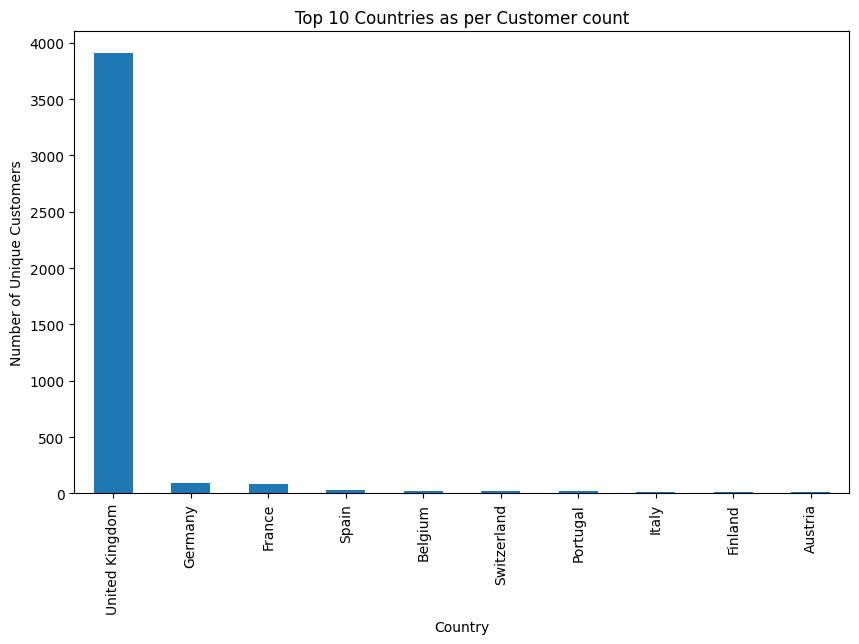

In [38]:
top_countries = (
    df_clean.groupby('Country')['CustomerID']
    .nunique()
    .sort_values(ascending=False)
    .head(10)
)
plt.figure(figsize=(10,6))
top_countries.plot(kind='bar')
plt.ylabel('Number of Unique Customers')
plt.title('Top 10 Countries as per Customer count')
plt.show()

*UK* is the largest market, followed by *Germany* and *France* with great difference in Customer count. The chart shows that the business is concentrated in Europe, suggesting possible expansion in the future.

### Sales Peak Hour and Month

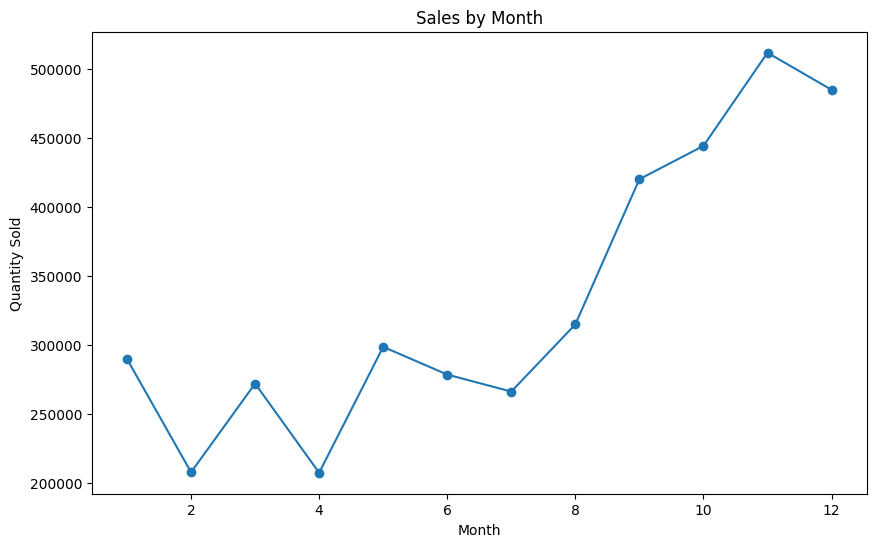

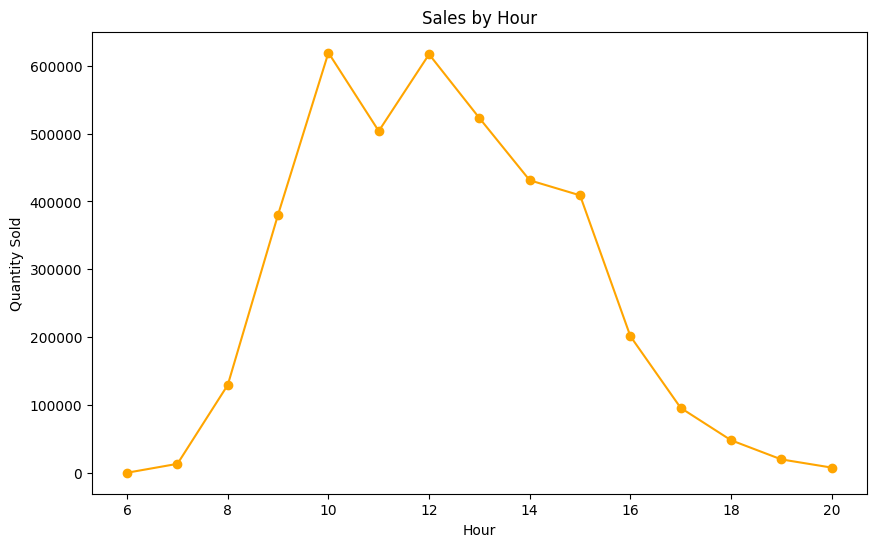

In [39]:
df_clean['InvoiceMonth'] = df_clean['InvoiceDate'].dt.month
df_clean['InvoiceHour'] = df_clean['InvoiceDate'].dt.hour

monthly_sales = df_clean.groupby('InvoiceMonth')['Quantity'].sum()
hourly_sales = df_clean.groupby('InvoiceHour')['Quantity'].sum()

plt.figure(figsize=(10,6))
monthly_sales.plot(marker='o')
plt.ylabel('Quantity Sold')
plt.xlabel('Month')
plt.title('Sales by Month')
plt.show()

plt.figure(figsize=(10,6))
hourly_sales.plot(marker='o', color='orange')
plt.ylabel('Quantity Sold')
plt.xlabel('Hour')
plt.title('Sales by Hour')
plt.show()

Sales peaks at *forenoon (10 to 12 am)*. *Novembor* sees most sales, likely due to holiday shopping and highlights the importance of seasonal campaigns.

### Top Spending Customers

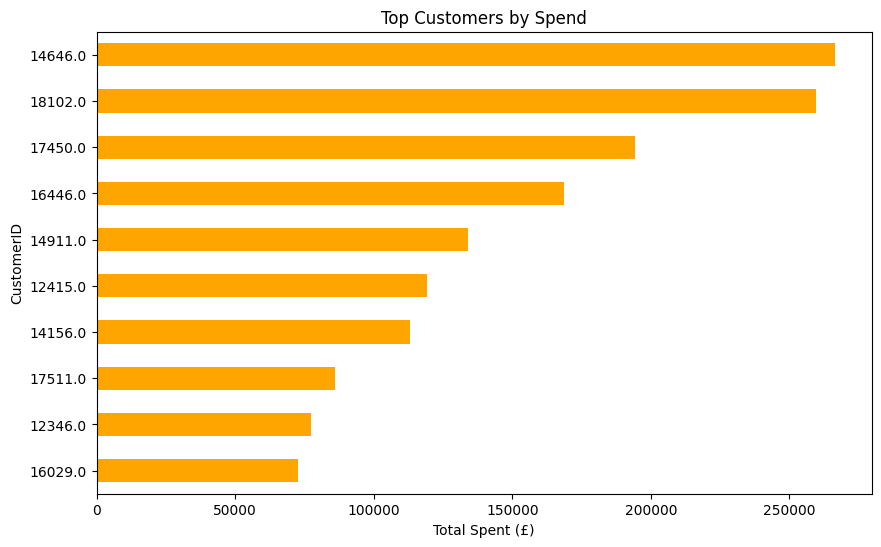

In [41]:
top_customers = (
    df_clean.groupby('CustomerID')['TotalPrice']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(10,6))
top_customers.plot(kind='barh', color='orange')
plt.title('Top Customers by Spend')
plt.xlabel('Total Spent (£)')
plt.ylabel('CustomerID')
plt.gca().invert_yaxis()
plt.show()

*Customer 14646*, closely followed by *Customer 18102* has spent over 250k£, possibly wholesale clients. They contribute in a greater ratio to the total sales, which should be prioritized for retention and loyalty concerns.